In [ ]:
#1
import pandas as pd #this to import pandas to help in data management
csvaYD = pd.read_excel("Cassava_Yield_Data.xlsx") #reading the excel dataset Cassava_Yield_Data

In [2]:
csvaYD.head(5)

,Sesn,locn,block,rep,tillage,ferT,Plants_harvested,No_bigtubers,Weigh_bigtubers,No_mediumtubers,Weight_mediumtubers,No_smalltubers,Weight_smalltubers,Totaltuberno,AV_tubers_Plant,Total_tubweight,plotsize,HEC,TotalWeightperhectare,TotalTuberperHectare
0,2,1,1,1,conv,F2150,28,0,0.0,61,2.5,319,4.7,380,13.571429,7.2,5.3,10000,13584.905660,716981.132075
1,2,1,1,1,conv,F1100,28,0,0.0,110,4.6,260,4.0,370,13.214286,8.6,5.3,10000,16226.415094,698113.207547
2,2,1,1,1,conv,F3200,28,2,0.2,115,5.2,319,4.4,436,15.571429,9.8,5.3,10000,18490.566038,822641.509434
3,2,1,1,1,conv,F5300,28,6,0.7,60,2.7,303,4.8,369,13.178571,8.2,5.3,10000,15471.698113,696226.415094
4,2,1,1,1,conv,F4250,28,3,0.3,82,3.4,332,4.7,417,14.892857,8.4,5.3,10000,15849.056604,786792.452830


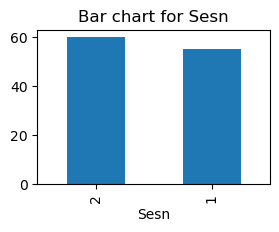

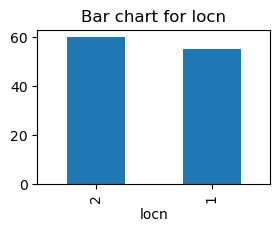

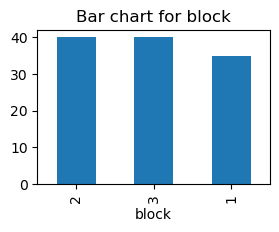

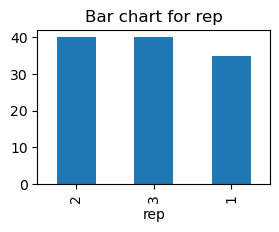

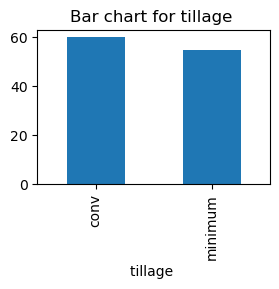

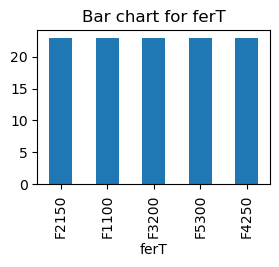

In [21]:
import matplotlib.pyplot as plt #importing matplotlib for graphs to check distribution

def cat_vs(): #defining a simple function to find out distribution of categorical variables
    cat_cols = csvaYD.iloc[:, :6] #the first 6 column are categorical variables so i used the pandas iloc indexer
    for col in cat_cols:
        plt.figure(figsize=(3,2))
        csvaYD[col].value_counts().plot(kind='bar')
        plt.title(f"Bar chart for {col}")
        plt.show()

cat_vs()        

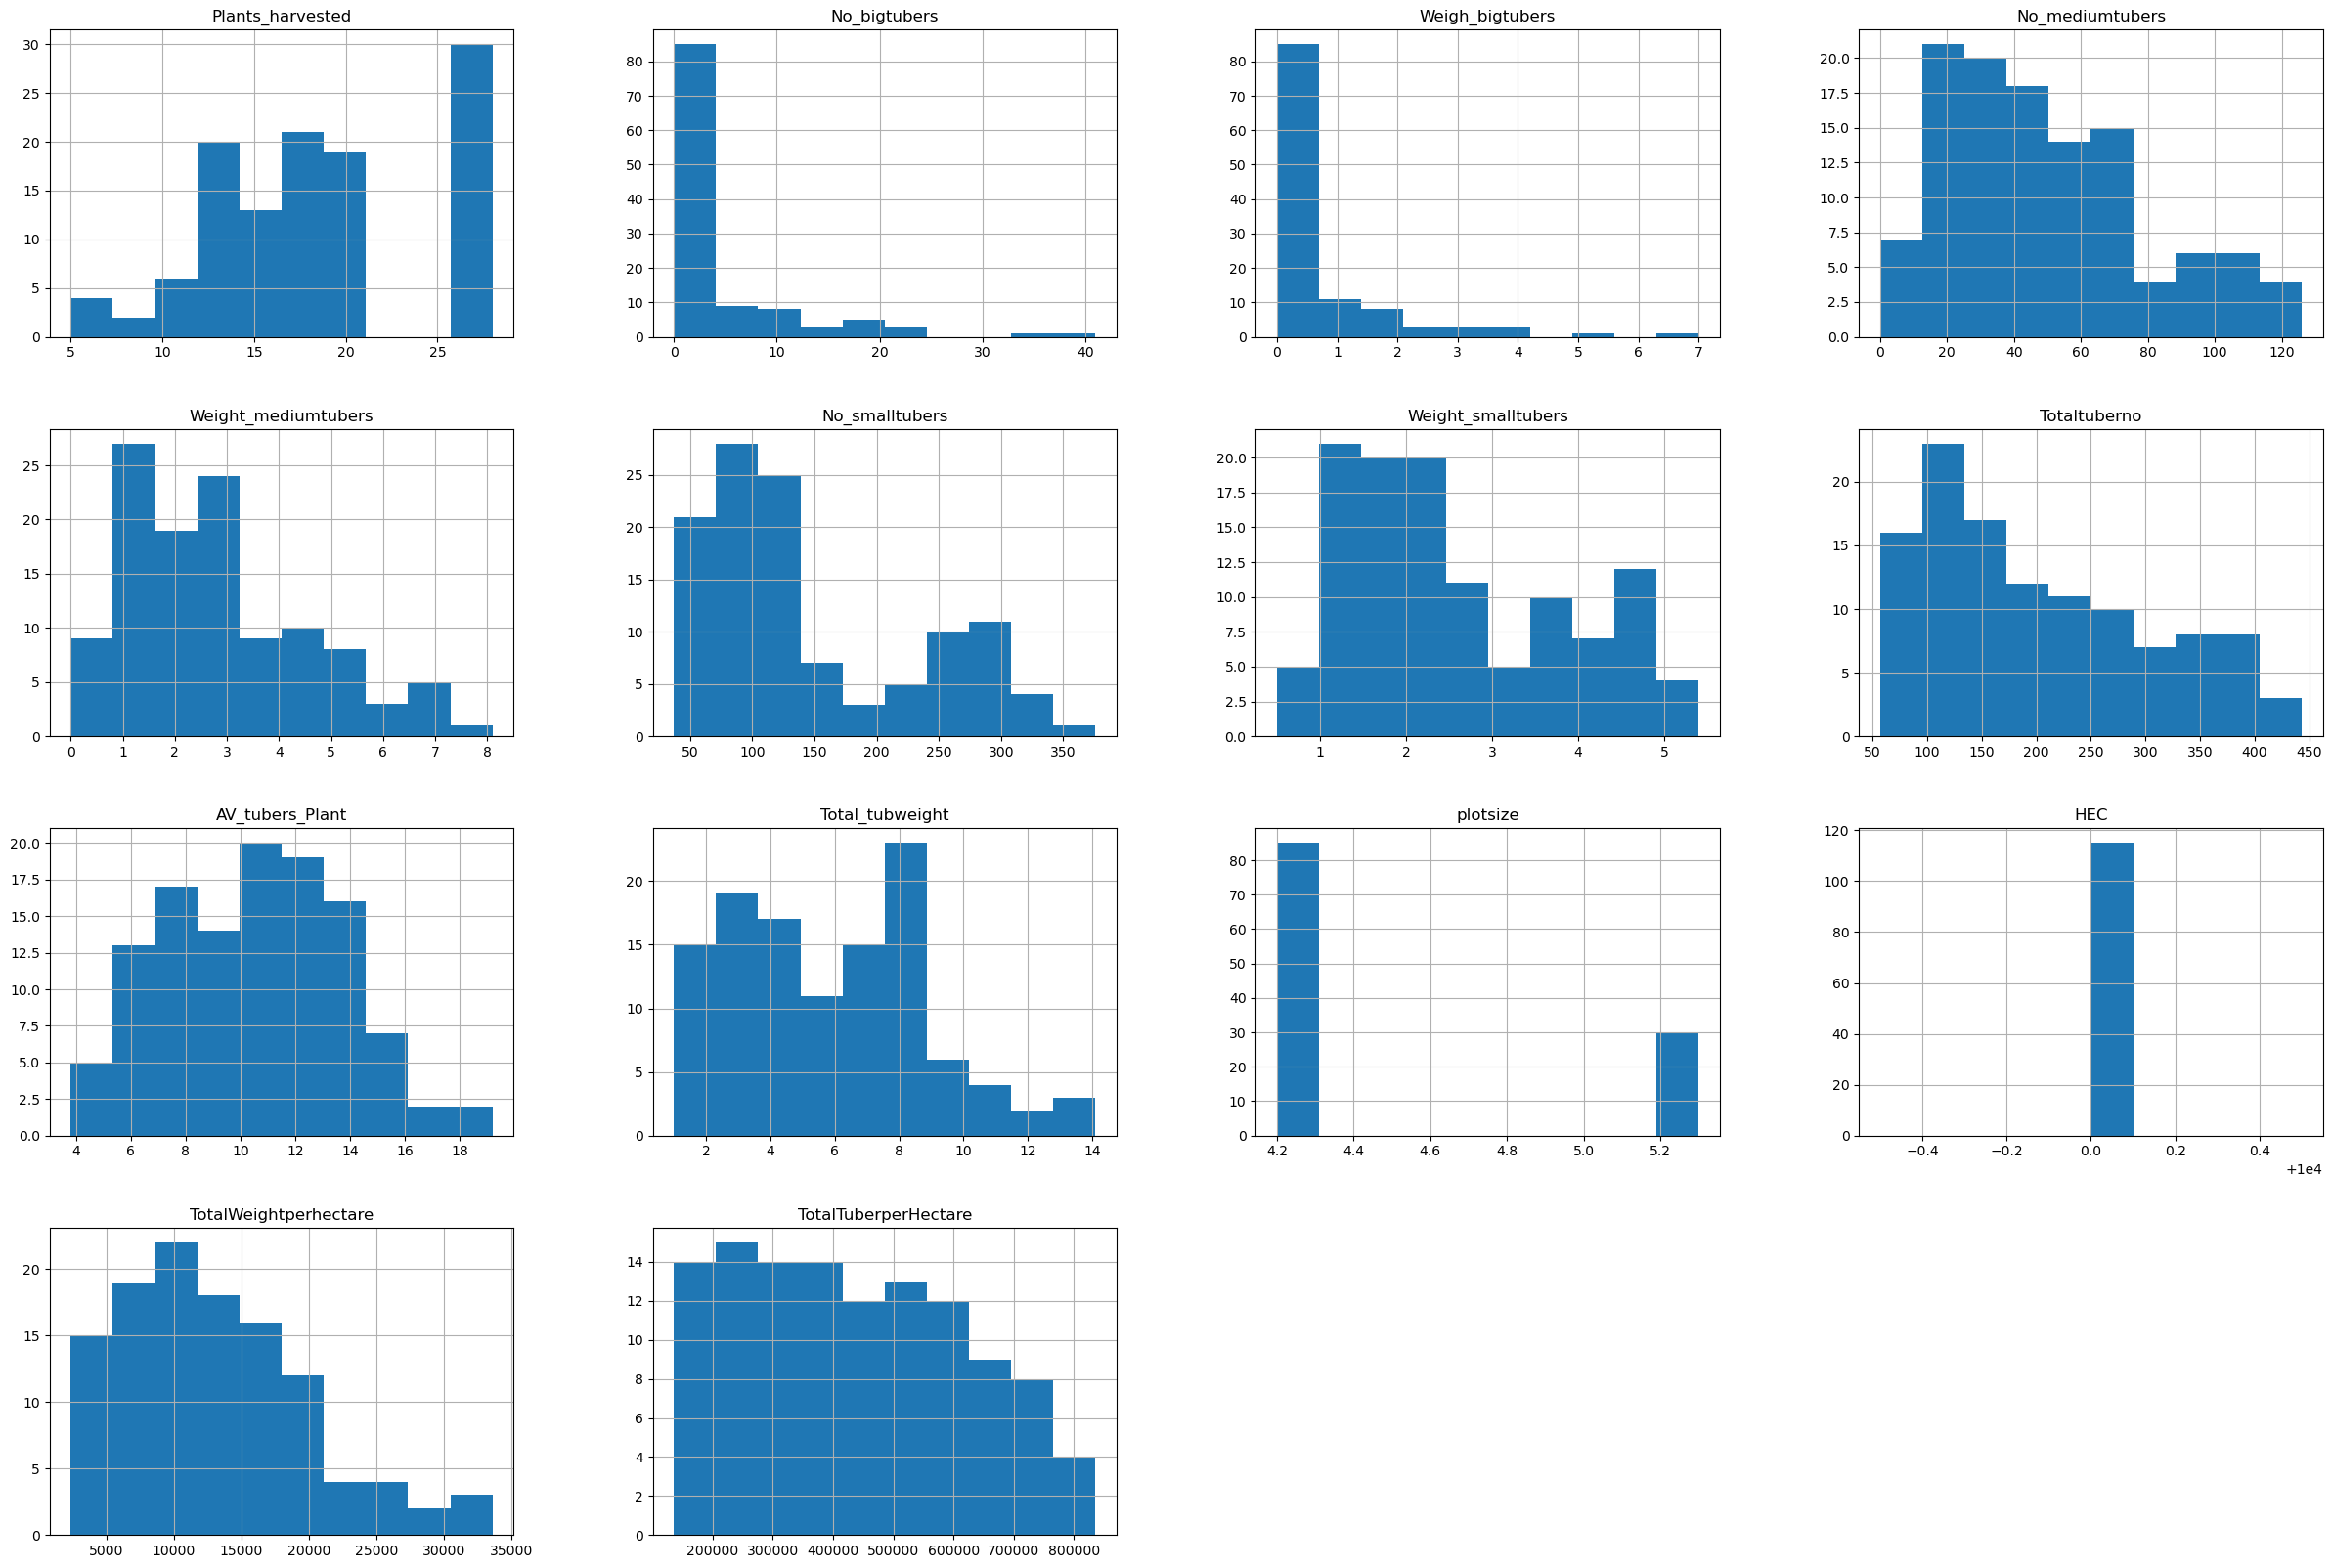

In [ ]:
cot_cols = csvaYD.iloc[:, -14:] #using pandas' iloc indexer to print last 14 columns which are continuous variables
cot_cols.hist(figsize=(30,20))
plt.show()

In [ ]:
csvaYD.isna().sum() #viewing if dataset has missing values and from output below it has not

Sesn                     0
locn                     0
block                    0
rep                      0
tillage                  0
ferT                     0
Plants_harvested         0
No_bigtubers             0
Weigh_bigtubers          0
No_mediumtubers          0
Weight_mediumtubers      0
No_smalltubers           0
Weight_smalltubers       0
Totaltuberno             0
AV_tubers_Plant          0
Total_tubweight          0
plotsize                 0
HEC                      0
TotalWeightperhectare    0
TotalTuberperHectare     0
dtype: int64

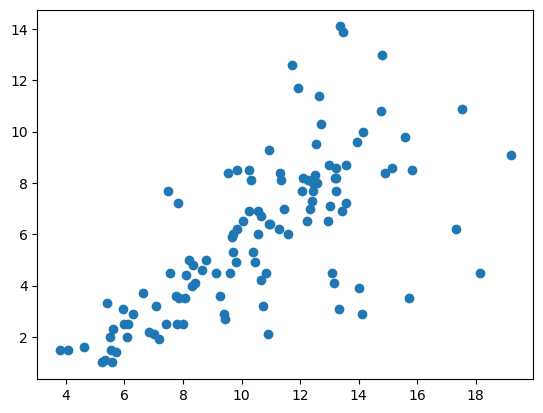

In [ ]:
#2a

plt.scatter(csvaYD['AV_tubers_Plant'], csvaYD['Total_tubweight']) #plotting a scatter plot on the two variables showing a positive relationship

In [ ]:
correlationdta = csvaYD[['AV_tubers_Plant', 'Total_tubweight']].corr() #running a correlation test on the two variables
correlationdta

# The correlation between AV_tubers_Plant and Total_tubweight is 0.6906.
# This is a strong positive correlation, as the average number of tubers per plant increases, total tuber weight also tends to increase.



,AV_tubers_Plant,Total_tubweight
AV_tubers_Plant,1.000000,0.690628
Total_tubweight,0.690628,1.000000


<Axes: title={'center': 'Total_tubweight'}, xlabel='tillage '>

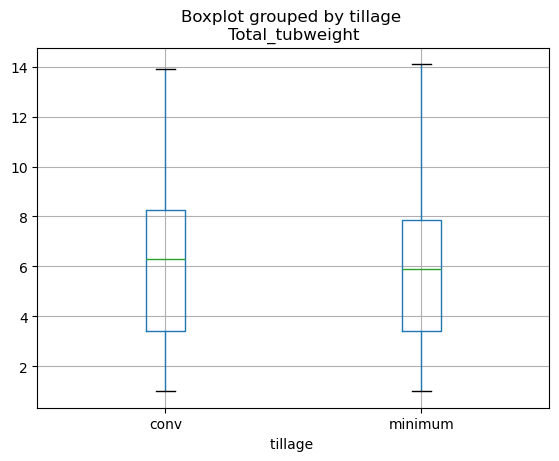

In [ ]:
#2b
csvaYD.boxplot(column='Total_tubweight', by='tillage ') #drawing a boxplot of total tube weight on tillage

#Both conventional and minimum tillage result in similar tuber weight distributions.
#There is no strong evidence from this boxplot that one tillage method produces higher tuber weight than the other.

In [ ]:
import scipy.stats as stats #importing scipy.stats to run an independent t test

#ho = There is no difference in mean Total_tubweight between conventional tillage and minimum tillage
#ha = There is a difference in mean Total_tubweight between conventional tillage and minimum tillage.

gp1 = csvaYD[csvaYD['tillage '] == 'conv']['Total_tubweight']
gp2 = csvaYD[csvaYD['tillage '] == 'minimum']['Total_tubweight']

t_stat, p_value = stats.ttest_ind(gp1, gp2) #running an independent t-test because categorical variables has two categories
print(t_stat, p_value)

#This t_stat 0.5911 is close to 0, implying the two group means (conventional vs minimum tillage) are not very different.
# it shows that the difference in Total_tubweight between the two tillage types is small relative to the variation in the data.
# By itself, a t-value of 0.59 is too small to be statistically significant. 

#since the p-value is 0.5556 is greater than 0.05 i have failed to reject the null, 
#there is therefore no difference in mean Total_tubweight between conventional tillage and minimum tillage

0.5911477861594856 0.5556020481162232


In [37]:
#2b
xcrosscat = pd.crosstab(csvaYD['Sesn'], csvaYD['locn']) #running crosstab on two categorical variables

xcrosscat

#For Season 1, Location 2 has slightly more observations than Location 1.
# For Season 2, both locations have the same number of observations.
# There is no strong imbalance between seasons and locations.

locn,1,2
Sesn,,
1,25,30
2,30,30


In [ ]:
from scipy.stats import chi2_contingency #importing chi2_contigency for chi-square square test of independence

ChiSq = chi2_contingency(xcrosscat)

ChiSq

#Chi-square statistic = 0.0903
# This value is very small, signifying that the observed counts are very close to the expected counts.
# Sesn and locn look very similar in their distribution.
#however p-value = 0.7637 is greater than 0.05. the result is not statistically significant.

Chi2ContingencyResult(statistic=np.float64(0.09035525711662087), pvalue=np.float64(0.7637260047014864), dof=1, expected_freq=array([[26.30434783, 28.69565217],
       [28.69565217, 31.30434783]]))

In [ ]:
#3a

from scipy.stats import f_oneway #importing f_oneway for oneway ANOVA

soroti = csvaYD[csvaYD['locn'] == 1] #obtaining Soroti farmers
fertyp_s = soroti['ferT'].unique() #storing all fertilizer types for soroti farmers
groups_w_s = [
    soroti[soroti['ferT'] == f]['TotalWeightperhectare'] #using list comprehension to filter soroti farmers with f type fertilizer
    for f in fertyp_s
]

f_stat_w_s, p_val_w_s = f_oneway(*groups_w_s)
print("Soroti oneway ANOVA fertilizer on total weight per hectare: ", "F-Statistic: ", f_stat_w_s, "P-Value: ", p_val_w_s)

# F-statistic = 0.6897 is small meaning the differences between the fertilizer groups are small relative to the variation within groups.

# Application of fertilizer has no significant contribution to total weight per hectare

#p-value = 0.6025 is greater than 0.05 meaning the result is not statistically significant.


groups_t_s = [
    soroti[soroti['ferT'] == f]['TotalTuberperHectare'] #using list comprehension to filter soroti farmers with f type fertilizer
    for f in fertyp_s
]

f_stat_t_s, p_val_t_s = f_oneway(*groups_t_s)
print("Soroti oneway ANOVA fertilizer on total tubers per hectare: ", "F-Statistic: ", f_stat_t_s, "P-Value: ", p_val_t_s)

# F-statistic = 0.3454 is small meaning the differences between the fertilizer groups are small relative to the variation within groups.

# Application of fertilizer has no significant contribution to total tubers per hectare

#p-value = 0.8459 is greater than 0.05 meaning the result is not statistically significant.


Soroti oneway ANOVA fertilizer on total weight per hectare:  F-Statistic:  0.6896716719366917 P-Value:  0.6025450971713016
Soroti oneway ANOVA fertilizer on total tubers per hectare:  F-Statistic:  0.3454230248518151 P-Value:  0.8459527506077995


In [ ]:
#3b
#I'll utilize t-test since tillage has two categoricals
#For TotalWeightperhectare

from scipy.stats import ttest_ind

conv_w = soroti[soroti['tillage '] == 'conv']['TotalWeightperhectare']
min_w  = soroti[soroti['tillage '] == 'minimum']['TotalWeightperhectare']

t_stat_w, p_val_w = ttest_ind(conv_w, min_w)
print("Tillage t-test on TotalWeightperhectare:", "T-Test: ", t_stat_w, "P-Value: :", p_val_w)

#There is no significant difference in TotalWeightperhectare between conventional and minimum tillage (t = 0.666, p = 0.508).
# therefore the tillage method does not significantly affect projected cassava yield per hectare among Soroti farmers.


Tillage t-test on TotalWeightperhectare: T-Test:  0.6659136752246352 P-Value: : 0.5083543834181132


In [ ]:
#For TotalTuberperHectare


conv_t = soroti[soroti['tillage '] == 'conv']['TotalTuberperHectare']
min_t  = soroti[soroti['tillage '] == 'minimum']['TotalTuberperHectare']

t_stat_t, p_val_t = ttest_ind(conv_t, min_t)
print("Tillage t-test on TotalTuberperHectare:", "T-Test: ", t_stat_t, "P-Value: :", p_val_t)

#There is no significant difference in TotalTuberperHectare between conventional and minimum tillage (t = 0.785, p = 0.436).
#therefore tillage method does not significantly influence tuber production per hectare among Soroti farmers.


Tillage t-test on TotalTuberperHectare: T-Test:  0.7846895060494891 P-Value: : 0.4361290810511623


In [56]:
#4
!pip install mlxtend
import mlxtend
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.frequent_patterns import fpgrowth


#because season and fertilisers are both categorical variables, we shall adopt the FP-Growth Algorithym
transactions = [
    a[1]['ferT'].tolist() 
    for a in list(csvaYD.groupby(['Sesn']))
]

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)

transactions = pd.DataFrame(te_ary, columns=te.columns_)
ferSn = transactions.describe()


In [57]:
transactions.head()

,F1100,F2150,F3200,F4250,F5300
0,True,True,True,True,True
1,True,True,True,True,True


In [ ]:
#computing and printing the association rules 

freq_items = apriori(transactions, min_support=0.1, use_colnames=True)
rules = association_rules(freq_items, metric="confidence", min_threshold=0.5)
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

    antecedents                   consequents  support  confidence  lift
0       (F2150)                       (F1100)      1.0         1.0   1.0
1       (F1100)                       (F2150)      1.0         1.0   1.0
2       (F1100)                       (F3200)      1.0         1.0   1.0
3       (F3200)                       (F1100)      1.0         1.0   1.0
4       (F4250)                       (F1100)      1.0         1.0   1.0
..          ...                           ...      ...         ...   ...
175     (F5300)  (F2150, F4250, F1100, F3200)      1.0         1.0   1.0
176     (F2150)  (F1100, F4250, F5300, F3200)      1.0         1.0   1.0
177     (F4250)  (F1100, F2150, F5300, F3200)      1.0         1.0   1.0
178     (F3200)  (F1100, F2150, F4250, F5300)      1.0         1.0   1.0
179     (F1100)  (F2150, F4250, F5300, F3200)      1.0         1.0   1.0

[180 rows x 5 columns]


c:\Users\LG\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


In [61]:
# Thw generated fertiliser co-occurrence rules by grouping fertiliser applications by season. 
# All discovered rules had support = 1.0, confidence = 1.0, and lift = 1.0. This indicates that all fertiliser 
# types appear together across all seasons. Therefore, no season-specific fertiliser associations exist.”

In [ ]:
#5
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd

# selecting the predictors
X = csvaYD[['TotalTuberperHectare', 'TotalWeightperhectare', 'Sesn', 'locn']]
y = csvaYD['Plants_harvested']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

#Fitting the regression model
model = LinearRegression()
model.fit(X_train, y_train)

#Predicting on the test set
y_pred = model.predict(X_test)

#Evaluating accuracy
r2 = r2_score(y_test, y_pred)

# Computing RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print("Model Accuracy (R²):", r2)
print("RMSE:", rmse)

#printing model coefficients
coeffs = pd.DataFrame({
    'Predictor': X.columns,
    'Coefficient': model.coef_
})
print(coeffs)

Model Accuracy (R²): 0.8054334929790765
RMSE: 2.7955999749565
               Predictor  Coefficient
0   TotalTuberperHectare     0.000015
1  TotalWeightperhectare    -0.000124
2                   Sesn     4.829523
3                   locn    -6.785233


In [ ]:
#The regression model for Plants_harvested achieved an R² of 0.805, meaning that the predictors explain 80.5% 
# of the variability in harvest outcomes. The RMSE of 2.80 plants shows high predictive accuracy. 
# Season and location were the strongest predictors, while TotalTuberperHectare and TotalWeightperhectare had relatively small effects.